# Week 6 Notebook - SVMs and CNNs

If you want to run the svm_gui.py example as we do in class, you will need to remove matplotlib installed with Anaconda (which breaks tkinter support) and reinstall it with pip. Use the following commands:

<code>conda uninstall matplotlib
pip install matplotlib</code>

Then from your command line, you can launch the application with ipython after navigating to the right directory:

<code>ipython svm_gui.py</code>

## Iris SVMs

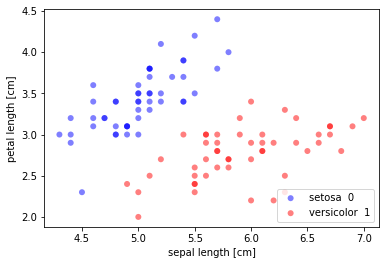

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=5)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# plot data
plt.scatter(X[:50, 0], X[:50, 1],alpha=0.5, c='b', edgecolors='none', label='setosa %2s'%(y[0]))
plt.scatter(X[50:100, 0], X[50:100, 1],alpha=0.5, c='r', edgecolors='none', label='versicolor %2s'%(y[50]))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower right')
plt.show()

def plot_decision_2d(clf,X,y,title="Decision Regions"):
    '''
    plot_decision_2d(clf,X,y)
    Plots a 2D decision region.
    '''
    # create a mesh to plot in
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    h = (x_max-x_min)/1000.0 # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, edgecolors='none')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.grid(alpha=0.2)
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Hinge loss 0.65


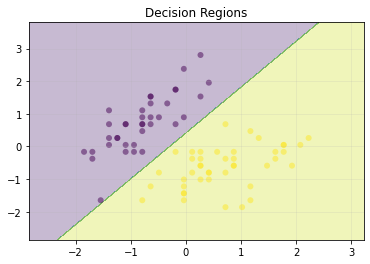

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss

svc = SVC(kernel='linear', C=1)
svc.fit(X_train_scaled, y_train)
predicted = svc.predict(X_test_scaled)
print(classification_report(y_test,predicted))
print("Hinge loss", hinge_loss(y_test,predicted))
plot_decision_2d(svc,X_train_scaled,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Hinge loss 0.65


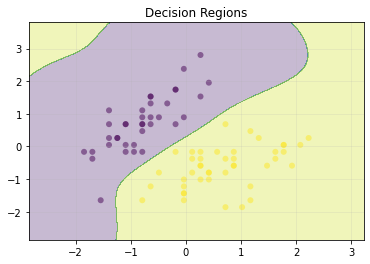

In [3]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss

svc = SVC(kernel='rbf', gamma=1, C=1)
svc.fit(X_train_scaled, y_train)
predicted = svc.predict(X_test_scaled)
print(classification_report(y_test,predicted))
print("Hinge loss", hinge_loss(y_test,predicted))
plot_decision_2d(svc,X_train_scaled,y_train)

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.50      1.00      0.67         7

    accuracy                           0.65        20
   macro avg       0.75      0.73      0.65        20
weighted avg       0.82      0.65      0.64        20

Hinge loss 1.0


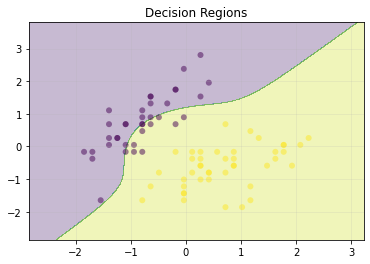

In [4]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss

svc = SVC(kernel='poly', degree=5, C=1)
svc.fit(X_train_scaled, y_train)
predicted = svc.predict(X_test_scaled)
print(classification_report(y_test,predicted))
print("Hinge loss", hinge_loss(y_test,predicted))
plot_decision_2d(svc,X_train_scaled,y_train)

## Disaster Tweets Revisitied: Cosine Similarity SVM

In [6]:
import pandas as pd
import numpy as np
from textblob import TextBlob
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import re

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

tweets = pd.read_csv('socialmedia-disaster-tweets-DFE.csv',encoding='latin1')[['text','choose_one']]
tweets.columns = ['tweet','class']
tweets = tweets[(tweets['class'] == 'Relevant') | (tweets['class'] == 'Not Relevant')]
tweets = tweets.reset_index(drop=True)

# Clean tweet text of HTML, etc.
tweets['tweet'] = tweets.tweet.map(preprocessor)

# Reindex randomly
tweets = tweets.reindex(index=np.random.permutation(tweets.index))

# Setup transformer analyzer and subsequent bag-of-words transformer
from nltk.corpus import stopwords
from string import ascii_lowercase as alphabet

import nltk
nltk.download('stopwords')

stop = stopwords.words('english')
stop.extend([str(letter) for letter in alphabet])

def split_into_lemmas(tweet):
    tweet = str(tweet).lower()
    words = TextBlob(tweet).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

# Create bag-of-words transformer to apply to data in next cell
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(tweets.tweet)

# Transform the tweets in dataset to bag-of-words
tweets_bow = bow_transformer.transform(tweets.tweet)
print('sparse matrix shape:', tweets_bow.shape)
print('number of non-zeros:', tweets_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * tweets_bow.nnz / (tweets_bow.shape[0] * tweets_bow.shape[1])))

# Split resulting tweets_bow vector into traning and testing sets
tweets_bow_train = tweets_bow[:8000]
tweets_bow_test = tweets_bow[8000:]
tweets_class_train = tweets['class'][:8000]
tweets_class_test = tweets['class'][8000:]

print("Tweets training shape: ", tweets_bow_train.shape)
print("Tweets testomg shape:  ", tweets_bow_test.shape)

ModuleNotFoundError: No module named 'textblob'

In [6]:
from sklearn.naive_bayes import MultinomialNB

tweet_class_clf  = MultinomialNB().fit(tweets_bow_train, tweets_class_train)

predictions = tweet_class_clf.predict(tweets_bow_test)

print("Multinomial Naive Bayes Results: \n")

print(classification_report(tweets_class_test, predictions))

def predict_tweet(new_tweet): 
    new_sample = bow_transformer.transform([new_tweet])
    print(new_tweet)
    print("MNB Prediction: ", np.around(tweet_class_clf.predict_proba(new_sample), decimals=5),"\n")

predict_tweet('Cat stuck in a tree.')
predict_tweet('FIRE ABLAZE')

Multinomial Naive Bayes Results: 

              precision    recall  f1-score   support

Not Relevant       0.81      0.85      0.83      1644
    Relevant       0.78      0.73      0.75      1216

    accuracy                           0.80      2860
   macro avg       0.79      0.79      0.79      2860
weighted avg       0.80      0.80      0.80      2860

Cat stuck in a tree.
MNB Prediction:  [[0.54817 0.45183]] 

FIRE ABLAZE
MNB Prediction:  [[0.36077 0.63923]] 



In [7]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics.pairwise import cosine_similarity

tweet_class_svc = SVC(kernel=cosine_similarity, C=0.85).fit(tweets_bow_train, tweets_class_train)

predictions = tweet_class_svc.predict(tweets_bow_test)

print("SVC Results: \n")

print(classification_report(tweets_class_test, predictions))

def predict_tweet_svc(new_tweet): 
    new_sample = bow_transformer.transform([new_tweet])
    print(new_tweet)
    print("SVC Prediction: ", tweet_class_svc.predict(new_sample)[0], "\n")

predict_tweet_svc('Cat stuck in a tree.')
predict_tweet_svc('FIRE ABLAZE')

SVC Results: 

              precision    recall  f1-score   support

Not Relevant       0.79      0.91      0.84      1644
    Relevant       0.84      0.68      0.75      1216

    accuracy                           0.81      2860
   macro avg       0.82      0.79      0.80      2860
weighted avg       0.81      0.81      0.80      2860

Cat stuck in a tree.
SVC Prediction:  Not Relevant 

FIRE ABLAZE
SVC Prediction:  Relevant 



## NotMNIST SVC

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import Perceptron


data = loadmat('notMNIST_small.mat')
X_temp = (data['images']/255)-0.5

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)
print(X_train.shape)
print(X_test.shape)

(14979, 784)
(3745, 784)


In [9]:
%%time

svc = LinearSVC(C=1)
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)

print("Linear SVC Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Linear SVC Results
Confusion Matrix: 
[[308   9   4   5   2   2   4  10   4  11]
 [  3 316   4   6   6  10   4   7  10   5]
 [  3   4 323   2   8   1  11   1   6   2]
 [  5  10   2 306   2   4   5   5   8  11]
 [  1   8  16   4 293   4  10   4  11   6]
 [  4   1   4   2   5 336   3   5  11   4]
 [  4   7  11   3   9   3 324   3  10   9]
 [ 18  10   5   6   3  10   7 330   9   4]
 [  8   2   2   7   9   9   9   7 340  20]
 [  6   6   1   8   4   7   4   5   8 317]]

 Classifcation Report
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       359
         1.0       0.85      0.85      0.85       371
         2.0       0.87      0.89      0.88       361
         3.0       0.88      0.85      0.87       358
         4.0       0.86      0.82      0.84       357
         5.0       0.87      0.90      0.88       375
         6.0       0.85      0.85      0.85       383
         7.0       0.88      0.82      0.85       402
         8.0       0.

C:\Users\EsraaPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
%%time

ppn = Perceptron()
ppn.fit(X_train, y_train)
predicted = ppn.predict(X_test)

print("Perceptron Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Perceptron Results
Confusion Matrix: 
[[312   4   1   6   7   2   4   6   8   9]
 [  2 313   3  14   8   7   6   2  15   1]
 [  4   4 322   6  12   2   5   0   5   1]
 [  4  12   0 317   1   2   1   2   7  12]
 [  1  19  13  15 257  14   5   1  26   6]
 [  7   2   2   3  16 329   1   0   9   6]
 [  4   8  25  17   8   8 299   2   7   5]
 [ 21   6   3  10  16   6   6 319  10   5]
 [ 12  12   1  13  13   6   6   6 327  17]
 [  2   2   2  12   9   5   7   1  12 314]]

 Classifcation Report
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       359
         1.0       0.82      0.84      0.83       371
         2.0       0.87      0.89      0.88       361
         3.0       0.77      0.89      0.82       358
         4.0       0.74      0.72      0.73       357
         5.0       0.86      0.88      0.87       375
         6.0       0.88      0.78      0.83       383
         7.0       0.94      0.79      0.86       402
         8.0       0.

In [11]:
%%time

svc = SVC(kernel='poly', degree=2, C=1)
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)

print("SVC w/Polynomial Kernel Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

C:\Users\EsraaPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC w/Polynomial Kernel Results
Confusion Matrix: 
[[311  13   1   0   2   0   4  10  14   4]
 [  2 335   0   2   6   2   6   3  15   0]
 [  0   7 313   1  15   2   8   0  15   0]
 [  6  25   0 305   3   1   3   2  11   2]
 [  3  13   5   1 312   2   6   1  12   2]
 [  2   5   0   0   6 343   0   2  14   3]
 [  3  20   4   2   6   3 326   4  12   3]
 [ 14  19   0   0   6   5   2 337  16   3]
 [  9   6   0   6   7   4   4   6 356  15]
 [  5   8   0   2   0   2   3   0  22 324]]

 Classifcation Report
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       359
         1.0       0.74      0.90      0.82       371
         2.0       0.97      0.87      0.92       361
         3.0       0.96      0.85      0.90       358
         4.0       0.86      0.87      0.87       357
         5.0       0.94      0.91      0.93       375
         6.0       0.90      0.85      0.88       383
         7.0       0.92      0.84      0.88       402
        

## Convolutional Neural Network

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

testing_size = 3745
training_size = X_temp.shape[2] - testing_size

X = np.empty(shape=[X_temp.shape[2]] + [1,28,28], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,0,:,:] = X_temp[:,:,i]

y = data['labels']

X_train, X_test, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=50)

y_train_orig = y_train_orig.reshape(-1,1)
y_test_orig = y_test_orig.reshape(-1,1)

In [2]:
enc = preprocessing.OneHotEncoder(sparse=False).fit(y_train_orig)
y_train = enc.transform(y_train_orig)
y_test = enc.transform(y_test_orig)

C:\Users\EsraaPC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2, l1
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='valid', input_shape=(1,28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = model.fit(X_train, y_train,  batch_size = 256,
          epochs = 3, verbose=2, validation_data=(X_test,y_test))

Train on 14979 samples, validate on 3745 samples
Epoch 1/3
 - 16s - loss: 0.1809 - acc: 0.9465 - val_loss: 0.2417 - val_acc: 0.9340
Epoch 2/3
 - 17s - loss: 0.1568 - acc: 0.9534 - val_loss: 0.2340 - val_acc: 0.9375
Epoch 3/3
 - 17s - loss: 0.1410 - acc: 0.9584 - val_loss: 0.2108 - val_acc: 0.9431


In [15]:
predicted = model.model.predict_classes(X_test)

In [16]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

print("Convolution Network Results\nConfusion Matrix: ")
print(confusion_matrix(y_test_orig,predicted))
print("\n Classifcation Report")
print(classification_report(y_test_orig,predicted))

Convolution Network Results
Confusion Matrix: 
[[336   0   4   0   0   4   1   6   5   3]
 [  0 355   2   2   4   2   2   0   4   0]
 [  1   0 344   1   3   1   9   1   1   0]
 [  5   3   1 341   1   1   1   0   1   4]
 [  0   4   7   1 337   3   3   0   2   0]
 [  0   1   1   0   0 368   0   0   3   2]
 [  2   3   8   2   3   4 355   0   5   1]
 [  5   2   0   6   1   4   3 376   3   2]
 [  5   2   3   9   5   3   1   4 366  15]
 [  0   0   0   5   0   0   0   1   6 354]]

 Classifcation Report
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       359
         1.0       0.96      0.96      0.96       371
         2.0       0.93      0.95      0.94       361
         3.0       0.93      0.95      0.94       358
         4.0       0.95      0.94      0.95       357
         5.0       0.94      0.98      0.96       375
         6.0       0.95      0.93      0.94       383
         7.0       0.97      0.94      0.95       402
         8.0